In [1]:
import requests

In [2]:
import pandas as pd

1.Start by using either the inspector or by viewing the page source. Can you identify a tag that might be helpful for finding the names of all inductees? Make use of this to create a list containing just the names of each inductee.

Answer: h3 is the tag that would be helpful for finding the names of all the inductees.

In [3]:
URL = 'https://countrymusichalloffame.org/hall-of-fame/members/'

response = requests.get(URL)

In [4]:
type(response)

requests.models.Response

In [5]:
response.status_code

200

Code worked! Response code was 200

In [6]:
requests.get('https://countrymusichalloffame.org/hall-of-fame/members/')

<Response [200]>

In [7]:
response.text

'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' /><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.e

In [8]:
from bs4 import BeautifulSoup as BS

In [9]:
soup = BS(response.text)
type(soup)

bs4.BeautifulSoup

In [10]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');
  </script>
  <!-- End Google Tag Manager -->
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=

In [11]:
soup.find('title')

<title>Hall of Fame Members | Country Music Hall of Fame</title>

In [12]:
type(soup.find('title'))

bs4.element.Tag

In [13]:
soup.find('title').text

'Hall of Fame Members | Country Music Hall of Fame'

In [14]:
names = soup.findAll('h3')
names = [x.text for x in names]
print(type(names))
names

<class 'list'>


['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Eddie Bayers']

In [15]:
for page in range(1,17):
    URL_name = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'
    name_req = requests.get(URL_name + str(page))
    inductees = soup.find_all('h3')
    inductees = [x.text for x in inductees] 
    
    #for i in range(4,19):
       # if page>1:
            #print(f"{(i-3)+page*15}" + titles[i].text)
        #else:
            #print(f"{i-3}" + titles[i].text)

In [16]:
inductees

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Eddie Bayers']

Let's try the other way

In [17]:
page = 1
while page != 18:
      urls = f"https://countrymusichalloffame.org/hall-of-fame/members/page/{page}"
      print(urls)
      page = page + 1

https://countrymusichalloffame.org/hall-of-fame/members/page/1
https://countrymusichalloffame.org/hall-of-fame/members/page/2
https://countrymusichalloffame.org/hall-of-fame/members/page/3
https://countrymusichalloffame.org/hall-of-fame/members/page/4
https://countrymusichalloffame.org/hall-of-fame/members/page/5
https://countrymusichalloffame.org/hall-of-fame/members/page/6
https://countrymusichalloffame.org/hall-of-fame/members/page/7
https://countrymusichalloffame.org/hall-of-fame/members/page/8
https://countrymusichalloffame.org/hall-of-fame/members/page/9
https://countrymusichalloffame.org/hall-of-fame/members/page/10
https://countrymusichalloffame.org/hall-of-fame/members/page/11
https://countrymusichalloffame.org/hall-of-fame/members/page/12
https://countrymusichalloffame.org/hall-of-fame/members/page/13
https://countrymusichalloffame.org/hall-of-fame/members/page/14
https://countrymusichalloffame.org/hall-of-fame/members/page/15
https://countrymusichalloffame.org/hall-of-fame/m

In [18]:
page = 1
HOF_inductees=[]
while page != 18:
      urls = f"https://countrymusichalloffame.org/hall-of-fame/members/page/{page}"
      response = requests.get(urls)
      html = response.content
      soup = BS(html, "lxml")
      for h3 in soup.find_all("h3"):
            HOF_inductees.append(h3.get_text(strip=True))
      page = page + 1

In [19]:
HOF_inductees

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Eddie Bayers',
 'Johnny Bond',
 'Bobby Braddock',
 'Harold Bradley',
 'Jerry Bradley',
 'Owen Bradley',
 'Rod Brasfield',
 'Garth Brooks',
 'Brooks & Dunn',
 'Jim Ed Brown',
 'Jim Ed Brown and the Browns',
 'Boudleaux and Felice Bryant',
 'Glen Campbell',
 'Bill Carlisle',
 'Carter Family',
 'Johnny Cash',
 'Ray Charles',
 'Roy Clark',
 'Cowboy Jack Clement',
 'Patsy Cline',
 'Hank Cochran',
 'Paul Cohen',
 'Floyd Cramer',
 'Vernon Dalhart',
 'Charlie Daniels',
 'Jimmie Davis',
 'Jimmy Dean',
 'Delmore Brothers',
 'Jim Denny',
 'Little Jimmy Dickens',
 'Dean Dillon',
 'Pete Drake',
 'Ralph Emery',
 'The Everly Brothers',
 'Flatt And Scruggs',
 'Jim Foglesong',
 'Red Foley',
 'Tennessee Ernie Ford',
 'Fred Foster',
 'Joseph Frank',
 'Lefty Frizzell',
 'Connie B. Gay',
 'Don Gibson',
 'Vince Gill',
 'Johnny Gimble',
 'Merle Haggard',
 'Tom T. Hall',
 'Emmylou Harr

2. Next, try and find a tag that could be used to find the year that each member was inducted. Extract these into a list. When you do this, be sure to only include the year and not the full text. For example, for Roy Acuff, the list entry should be "1962" and not "Inducted 1962". Double-check that the resulting list has the correct number of elements and is in the same order as your inductees list.

In [20]:
import re

In [21]:
years = str(soup.findAll(attrs={'class' : 'vertical-card_content--copy'}))
years = re.findall(r"\d{4}", years)

In [22]:
years

['2014', '1998', '2000']

In [23]:
page = 1
year = []
while page != 18:
      urls = f"https://countrymusichalloffame.org/hall-of-fame/members/page/{page}"
      response = requests.get(urls)
      html = response.content
      soup = BS(html, "lxml")
      years_all = str(soup.findAll(attrs={'class' : 'vertical-card_content--copy'}))
      years_all = re.findall(r"\d{4}", years_all)
      year.append(years_all)
      page = page + 1

In [24]:
year

[['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '2022'],
 ['1999', '2011', '2006', '2019', '1974', '1987', '2012', '2019', '2015'],
 ['2015', '1991', '2005', '2002', '1970', '1980', '2022', '2009', '2013'],
 ['1973', '2014', '1976', '2003', '1981', '2016', '1972', '2010', '2001'],
 ['1966', '1983', '2021', '2022', '2007', '2001', '1985', '2004', '1967'],
 ['1990', '2016', '1967', '1982', '1980', '2001', '2007', '2018', '1994'],
 ['2008', '2008', '1966', '2001', '1982', '1997', '2010', '2017', '2006'],
 ['2001', '1992', '1978', '2001', '1974', '2004', '2001', '1997', '1979'],
 ['2001', '1988', '1966', '2009', '2015', '2009', '2011', '1995', '2014'],
 ['1970', '1996', '1998', '2001', '1993', '2015', '1996', '1999', '1975'],
 ['1984', '2001', '2001', '1998', '1992', '1996', '2000', '2017', '1967'],
 ['1964', '2012', '1982', '1961', '2013', '1988', '1961', '1986', '1971'],
 ['2017', '2011', '2010', '1967', '2018', '2003', '2012', '1979', '1980'],
 ['1989', '2019', '1989',

In [25]:
flat_list=list()
for sub_list in year:
    flat_list += sub_list
year = flat_list
year

['1962',
 '2005',
 '2001',
 '1966',
 '1973',
 '1969',
 '2005',
 '2013',
 '2022',
 '1999',
 '2011',
 '2006',
 '2019',
 '1974',
 '1987',
 '2012',
 '2019',
 '2015',
 '2015',
 '1991',
 '2005',
 '2002',
 '1970',
 '1980',
 '2022',
 '2009',
 '2013',
 '1973',
 '2014',
 '1976',
 '2003',
 '1981',
 '2016',
 '1972',
 '2010',
 '2001',
 '1966',
 '1983',
 '2021',
 '2022',
 '2007',
 '2001',
 '1985',
 '2004',
 '1967',
 '1990',
 '2016',
 '1967',
 '1982',
 '1980',
 '2001',
 '2007',
 '2018',
 '1994',
 '2008',
 '2008',
 '1966',
 '2001',
 '1982',
 '1997',
 '2010',
 '2017',
 '2006',
 '2001',
 '1992',
 '1978',
 '2001',
 '1974',
 '2004',
 '2001',
 '1997',
 '1979',
 '2001',
 '1988',
 '1966',
 '2009',
 '2015',
 '2009',
 '2011',
 '1995',
 '2014',
 '1970',
 '1996',
 '1998',
 '2001',
 '1993',
 '2015',
 '1996',
 '1999',
 '1975',
 '1984',
 '2001',
 '2001',
 '1998',
 '1992',
 '1996',
 '2000',
 '2017',
 '1967',
 '1964',
 '2012',
 '1982',
 '1961',
 '2013',
 '1988',
 '1961',
 '1986',
 '1971',
 '2017',
 '2011',
 '2010',
 

3.Take the two lists you created on parts 1 and 2 and convert it into a pandas DataFrame.

In [26]:
cm_hof = {'Inductees': HOF_inductees, 'Year': year}
cm_hof = pd.DataFrame(cm_hof)

In [27]:
cm_hof.head()

,Inductees,Year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973


4. Now, you need to take what you created for the first page and apply it across the rest of the pages so that you can scrape all inductees. Notice that when you click the next page button at the bottom of the page that the url changes to "https://countrymusichalloffame.org/hall-of-fame/members/page/2". Check that the code that you wrote for the first page still works for page 2. Once you have verified that your code will still work, write a for loop that will cycle through all 16 pages and build a DataFrame containing all inductees and the year of their induction.

Answer: See all code above.

5. Create a visual using the data that you scraped. Prepare a short (<5 minute) presentation.

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
cm_hof['Year'].value_counts()

2001    12
2022     4
2010     4
1998     4
1966     4
1967     4
2015     4
2008     4
1997     3
1999     3
2005     3
2006     3
2007     3
2009     3
2012     3
2011     3
1989     3
2013     3
2014     3
2016     3
2017     3
2018     3
2019     3
2021     3
1996     3
1961     3
1980     3
1982     3
1988     2
2000     2
1970     2
1973     2
1974     2
1976     2
1979     2
2004     2
2003     2
2002     2
1981     2
1992     2
1986     2
1995     2
1984     2
1991     1
1964     1
1965     1
1968     1
1969     1
1990     1
1971     1
1972     1
1983     1
1962     1
1993     1
1977     1
1978     1
1994     1
1987     1
1985     1
1975     1
Name: Year, dtype: int64

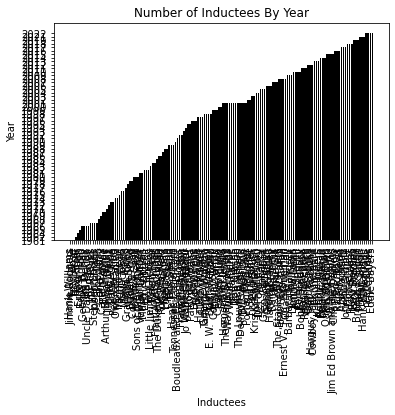

In [61]:
plt.bar(cm_hof.Inductees,cm_hof.Year, color='black')
plt.title('Number of Inductees By Year')
plt.xlabel('Inductees')
plt.ylabel('Year')
plt.xticks(rotation = 90)
plt.show()

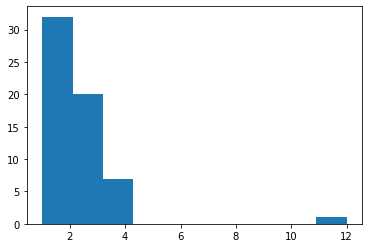

In [62]:
plt.hist(cm_hof['Year'].value_counts())
plt.show()

Bonus Question: If you navigate to Roy Acuff's page, you will see that his date of birth and date of death are listed towards the top of the page, along with his birthplace. Write some code that will extract these three values. Once you get it working for Roy Acuff, figure out how you can automatically extract these values across the whole dataset of artists. In doing this, you'll need to figure out a way to automatically determine the correct urls for each artist. Note also that not every artist will have these three values, so write your code in a way that it can handle cases where these values are missing. Alabama is one such example.

In [37]:
URL_Roy = 'https://countrymusichalloffame.org/artist/roy-acuff/'

response_roy = requests.get(URL_Roy)

In [38]:
type(response_roy)

requests.models.Response

In [39]:
response_roy.status_code

200

In [40]:
requests.get('https://countrymusichalloffame.org/artist/roy-acuff/')

<Response [200]>

In [41]:
response_roy.text

'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' /><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.e

In [42]:
soup2 = BS(response_roy.text)
type(soup2)

bs4.BeautifulSoup

In [43]:
print(soup2.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');
  </script>
  <!-- End Google Tag Manager -->
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=

In [44]:
type(soup2.find('title'))

bs4.element.Tag

In [45]:
soup2.find('title').text

'Roy Acuff | Artist Bio | Country Music Hall of Fame'

In [46]:
soup2.findAll('p')

[<p style="text-align: center;">Open Daily</p>,
 <p>INDUCTED :  1962</p>,
 <p></p>,
 <p>Roy Claxton Acuff emerged as a star during the early 1940s.</p>,
 <p style="margin-top: 20px;color: #50565A;font-size: 14px;font-weight: 500;letter-spacing: 1.5px;line-height: 25px; text-transform: uppercase;">Birth: September 15, 1903 - Death: November 23, 1992 <br/> Birthplace: Maynardville, Tennessee </p>,
 <p class="p1"><span class="s1"><p>He helped intensify the star system at the Grand Ole Opry and remained its leading personality until his death. In so doing, he formed the bridge between country’s rural stringband era and the modern era of star singers backed by fully amplified bands. In addition, he co-founded Acuff-Rose Publications with songwriter Fred Rose, thus laying an important cornerstone of the Nashville music industry. For these and other accomplishments he was elected to the Country Music Hall of Fame in 1962 as its first living member.</p>
 </span></p>,
 <p>He helped intensify th

In [51]:
dob = soup2.findAll('p')
dob = dob[4].text
print(type(dob))
dob

<class 'str'>


'Birth: September 15, 1903 - Death: November 23, 1992  Birthplace: Maynardville, Tennessee '